# Market Basket Analysis

- Market Basket Analysis is a technique that identifies the strength of association between pairs of products purchased together and identify patterns of co-occurrence(co-occurrence is when two or more things take place together).
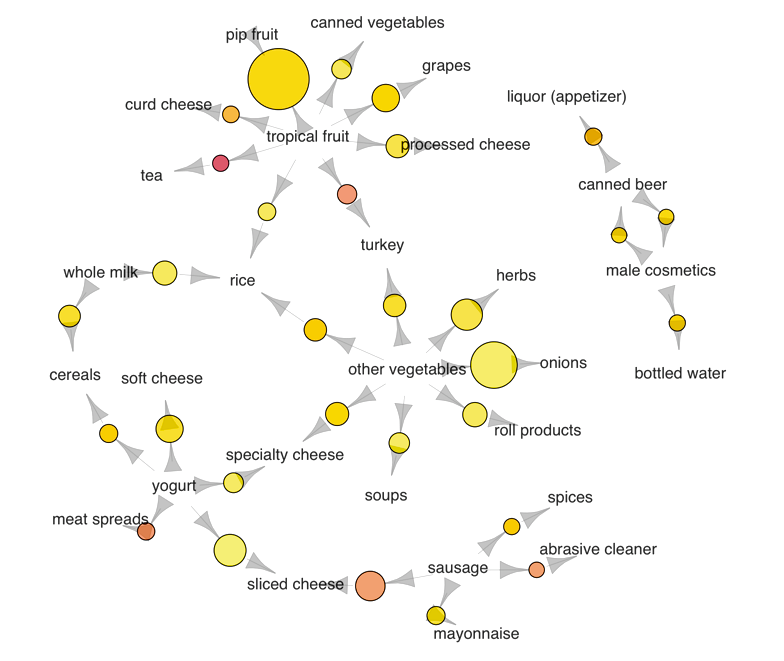


- The process of identifying an association between products/items is called ***Association Rule Mining***. 
- MBA creates If-Then scenario rules, for example, if item A is purchased then item B is likely to be purchased. 
- The rules are probabilistic in nature or, i.e, they are derived from the frequencies of co-occurrence in the observations(Frequency is the proportion of baskets that contain the items of interest)
- The rules can be used in pricing strategies, product placement, and various types of cross-selling strategies.
- MBA takes data at transaction level, which lists all items bought by a customer in a single purchase.
- The technique determines relationships of what products were purchased with which other product(s). 
- These relationships are then used to build profiles containing If-Then rules of the items purchased.
- The rules could be written as:
        If {A} Then {B}
- The If part of the rule ({A}) is the antecedent and the THEN({B}) part of the rule is the consequent. 
- The antecedent is the condition and the consequent is the result. 
- The association rule has three measures that express the degree of confidence in the rule:
    1. Support
    - Support of the item x is nothing but the ratio of the number of transactions in which the item(s) appears to the total number of transactions.
    - It can measure how frequently the collection of items occur together as a percentage of all transactions i.e the number of transactions that include items in {A} and {B} parts as a percentage of the total number of transactions. 
            support = (A + B) / Total
    2. Confidence
    - Is the ratio of the number of transactions that include all items in {B} as well as the number of transactions that include all items in {A} to the number of transactions that include all items in {A}.
    - Confidence signifies the likelihood of the item {B} being purchased when the item {A} is purchased. 
    - This method takes into account the popularity of the item {A}.
            confidence = (A + B) / A
    3. Lift.
    - Is the ratio of confidence to expected confidence (Expected confidence is the confidence divided by the frequency of B)
    - The Lift tells us how much better a rule is at predicting the result than just assuming the result in the first place. 
    - It's nothing but the ‘interestingness’ or the likelihood of the item {B} being purchased when the item {A} is sold. 
    - Unlike confidence, this method takes into account the popularity of the item {B}.
    - Greater lift values indicate stronger associations:
        - Lift (A => B) = 1 means that there is no correlation within the itemset.
        - Lift (A => B) > 1 means that there is a positive correlation within the itemset, i.e., products in the itemset are more likely to be bought together.
        - Lift (A => B) < 1 means that there is a negative correlation within the itemset, i.e product in the itemset are unlikely to be bought together.
                lift = ((A + B) / A) / (B / Total)
- To implement association rule mining, many algorithms have been developed:
1. Apriori Algorithm 
2. Eclat Algorithm

In [ ]:
import numpy as np
import pandas as pd
pd.options.display.max_rows = None
pd.options.display.max_columns = None
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Market_Basket_Optimisation.csv to Market_Basket_Optimisation.csv


In [ ]:
data = pd.read_csv('Market_Basket_Optimisation.csv', header=None)
data.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#1. Apriori Algorithm
- The key concept in the Apriori algorithm is that it assumes all subsets of a frequent itemset to be frequent. i.e according to the principle of Apriori, if {wine, chips, bread} is frequent, then {wine, bread} must also be frequent.Similarly, for any infrequent itemset, all its supersets must also be infrequent.

1. Apriori with Apyori

In [ ]:
transactions = []
for i in range(0, data.shape[0]):
    transactions.append([str(data.values[i,j]) for j in range(0, data.shape[1])])
print(transactions)

[['shrimp', 'almonds', 'avocado', 'vegetables mix', 'green grapes', 'whole weat flour', 'yams', 'cottage cheese', 'energy drink', 'tomato juice', 'low fat yogurt', 'green tea', 'honey', 'salad', 'mineral water', 'salmon', 'antioxydant juice', 'frozen smoothie', 'spinach', 'olive oil'], ['burgers', 'meatballs', 'eggs', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'], ['chutney', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'], ['turkey', 'avocado', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'], ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'], ['low fat yogurt', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan

In [ ]:
%pip install apyori

  Created wheel for apyori: filename=apyori-1.1.2-cp36-none-any.whl size=5975 sha256=334298b349cfd9ae00cefd21a10069344d461cc78815bde39f30627bf694891b
  Stored in directory: /root/.cache/pip/wheels/5d/92/bb/474bbadbc8c0062b9eb168f69982a0443263f8ab1711a8cad0
Successfully built apyori


In [ ]:
from apyori import apriori

Suppose we want rules for only those items that are purchased at least 3 times a day, or 7 x 5 = 35 times in one week, since the dataset is for a one-week time period. 

In [ ]:
# We want rules for only those items that are purchased at least 3 times a day, or 7 x 3 times in one week, 
# since the dataset is for a one-week time period. 
support = (3 * 7) / len(data) 
# we want at least 2 product in our rules
min_length = 2

In [ ]:
association_rules = apriori(transactions, min_support=support, min_confidence=0.5, lift=3, min_length=min_length)

In [ ]:
results = list(association_rules)
print(results)

[RelationRecord(items=frozenset({'nan'}), support=0.9998666844420744, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'nan'}), confidence=0.9998666844420744, lift=1.0)]), RelationRecord(items=frozenset({'nan', 'almonds'}), support=0.020263964804692707, ordered_statistics=[OrderedStatistic(items_base=frozenset({'almonds'}), items_add=frozenset({'nan'}), confidence=0.9934640522875817, lift=0.9935965141612201)]), RelationRecord(items=frozenset({'nan', 'antioxydant juice'}), support=0.008798826823090255, ordered_statistics=[OrderedStatistic(items_base=frozenset({'antioxydant juice'}), items_add=frozenset({'nan'}), confidence=0.9850746268656716, lift=0.9852059701492537)]), RelationRecord(items=frozenset({'nan', 'asparagus'}), support=0.004666044527396347, ordered_statistics=[OrderedStatistic(items_base=frozenset({'asparagus'}), items_add=frozenset({'nan'}), confidence=1.0, lift=1.0001333333333333)]), RelationRecord(items=frozenset({'nan', 'avocado'}), suppo

2. Apriori with mlxtend

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Online Retail.xlsx to Online Retail.xlsx


In [ ]:
data_2 = pd.read_excel('Online Retail.xlsx')
data_2.head()

,InvoiceNo,StockCode,lower,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
data_2['Description'] = data_2['Description'].str.strip() # Stripping extra spaces in the description 

# Dropping the rows without any invoice number 
data_2.dropna(axis=0, subset =['InvoiceNo'], inplace = True) 
data_2['InvoiceNo'] = data_2['InvoiceNo'].astype('str') 
  
data_2 = data_2[~data_2['InvoiceNo'].str.contains('C')] # Dropping all transactions which were done on credit 

Splitting data according to regions of transaction

In [ ]:
basket_fr = (data_2[data_2['Country'] =="France"].groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('InvoiceNo')) 
basket_fr.head()

Description  10 COLOUR SPACEBOY PEN  12 COLOURED PARTY BALLOONS  \
InvoiceNo                                                         
536370                          0.0                         0.0   
536852                          0.0                         0.0   
536974                          0.0                         0.0   
537065                          0.0                         0.0   
537463                          0.0                         0.0   

Description  12 EGG HOUSE PAINTED WOOD  12 MESSAGE CARDS WITH ENVELOPES  \
InvoiceNo                                                                 
536370                             0.0                              0.0   
536852                             0.0                              0.0   
536974                             0.0                              0.0   
537065                             0.0                              0.0   
537463                             0.0                              0.0   

Description  12 PENCIL SMALL TUBE WOODLAND  \
InvoiceNo                                    
536370                                 0.0   
536852                                 0.0   
536974                                 0.0   
537065                                 0.0   
537463                                 0.0   

Description  12 PENCILS SMALL TUBE RED RETROSPOT  12 PENCILS SMALL TUBE SKULL  \
InvoiceNo                                                                       
536370                                       0.0                          0.0   
536852                                       0.0                          0.0   
536974                                       0.0                          0.0   
537065                                       0.0                          0.0   
537463                                       0.0                          0.0   

Description  12 PENCILS TALL TUBE POSY  12 PENCILS TALL TUBE RED RETROSPOT  \
InvoiceNo                                                                    
536370                             0.0                                 0.0   
536852                             0.0                                 0.0   
536974                             0.0                                 0.0   
537065                             0.0                                 0.0   
537463                             0.0                                 0.0   

Description  12 PENCILS TALL TUBE WOODLAND  \
InvoiceNo                                    
536370                                 0.0   
536852                                 0.0   
536974                                 0.0   
537065                                 0.0   
537463                                 0.0   

Description  15CM CHRISTMAS GLASS BALL 20 LIGHTS  \
InvoiceNo                                          
536370                                       0.0   
536852                                       0.0   
536974                                       0.0   
537065                                       0.0   
537463                                       0.0   

Description  16 PIECE CUTLERY SET PANTRY DESIGN  \
InvoiceNo                                         
536370                                      0.0   
536852                                      0.0   
536974                                      0.0   
537065                                      0.0   
537463                                      0.0   

Description  18PC WOODEN CUTLERY SET DISPOSABLE  20 DOLLY PEGS RETROSPOT  \
InvoiceNo                                                                  
536370                                      0.0                      0.0   
536852                                      0.0                      0.0   
536974                                      0.0                      0.0   
537065                                      0.0                      0.0   
537463                                      0.0                 

In [ ]:
def hot_encode(x): 
    if(x<= 0): 
        return 0
    if(x>= 1): 
        return 1

basket_fr = basket_fr.applymap(hot_encode) 
basket_fr.head()

Description  10 COLOUR SPACEBOY PEN  12 COLOURED PARTY BALLOONS  \
InvoiceNo                                                         
536370                            0                           0   
536852                            0                           0   
536974                            0                           0   
537065                            0                           0   
537463                            0                           0   

Description  12 EGG HOUSE PAINTED WOOD  12 MESSAGE CARDS WITH ENVELOPES  \
InvoiceNo                                                                 
536370                               0                                0   
536852                               0                                0   
536974                               0                                0   
537065                               0                                0   
537463                               0                                0   

Description  12 PENCIL SMALL TUBE WOODLAND  \
InvoiceNo                                    
536370                                   0   
536852                                   0   
536974                                   0   
537065                                   0   
537463                                   0   

Description  12 PENCILS SMALL TUBE RED RETROSPOT  12 PENCILS SMALL TUBE SKULL  \
InvoiceNo                                                                       
536370                                         0                            0   
536852                                         0                            0   
536974                                         0                            0   
537065                                         0                            0   
537463                                         0                            0   

Description  12 PENCILS TALL TUBE POSY  12 PENCILS TALL TUBE RED RETROSPOT  \
InvoiceNo                                                                    
536370                               0                                   0   
536852                               0                                   0   
536974                               0                                   0   
537065                               0                                   0   
537463                               0                                   0   

Description  12 PENCILS TALL TUBE WOODLAND  \
InvoiceNo                                    
536370                                   0   
536852                                   0   
536974                                   0   
537065                                   0   
537463                                   0   

Description  15CM CHRISTMAS GLASS BALL 20 LIGHTS  \
InvoiceNo                                          
536370                                         0   
536852                                         0   
536974                                         0   
537065                                         0   
537463                                         0   

Description  16 PIECE CUTLERY SET PANTRY DESIGN  \
InvoiceNo                                         
536370                                        0   
536852                                        0   
536974                                        0   
537065                                        0   
537463                                        0   

Description  18PC WOODEN CUTLERY SET DISPOSABLE  20 DOLLY PEGS RETROSPOT  \
InvoiceNo                                                                  
536370                                        0                        0   
536852                                        0                        0   
536974                                        0                        0   
537065                                        0                        0   
537463                                        0                 

Building the Model

In [ ]:
# Building the model 
freq_items = apriori(basket_fr, min_support = 0.05, use_colnames = True) 
  
# Collecting the inferred rules in a dataframe 
rules = association_rules(frq_items, metric ="lift", min_threshold=1) 
rules = rules.sort_values(['confidence', 'lift'], ascending=[False, False]) 
print(rules.head()) 

                                           antecedents  \
45                        (JUMBO BAG WOODLAND ANIMALS)   
260  (RED TOADSTOOL LED NIGHT LIGHT, PLASTERS IN TI...   
272  (RED TOADSTOOL LED NIGHT LIGHT, PLASTERS IN TI...   
302  (SET/6 RED SPOTTY PAPER CUPS, SET/20 RED RETRO...   
301  (SET/6 RED SPOTTY PAPER PLATES, SET/20 RED RET...   

                         consequents  antecedent support  consequent support  \
45                         (POSTAGE)            0.076531            0.765306   
260                        (POSTAGE)            0.051020            0.765306   
272                        (POSTAGE)            0.053571            0.765306   
302  (SET/6 RED SPOTTY PAPER PLATES)            0.102041            0.127551   
301    (SET/6 RED SPOTTY PAPER CUPS)            0.102041            0.137755   

      support  confidence      lift  leverage  conviction  
45   0.076531       1.000  1.306667  0.017961         inf  
260  0.051020       1.000  1.306667  0.011974     